KLMN:
 [[-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1  1]]

ABCD:
 [[ 5.          5.        ]
 [ 9.          7.30940108]
 [ 9.         11.30940108]
 [ 5.          9.        ]]

Матрица F:
 [[2.00000000e+00 4.71844785e-16 7.00000000e+00]
 [1.15470054e+00 2.00000000e+00 8.15470054e+00]
 [0.00000000e+00 8.32667268e-17 1.00000000e+00]]

Проверка F(KLMN):
 [[ 5.          5.        ]
 [ 9.          7.30940108]
 [ 9.         11.30940108]
 [ 5.          9.        ]] 
(должно совпадать с ABCD)

Проверка F⁻¹(ABCD):
 [[-1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1.  1.]] 
(должно совпадать с KLMN)


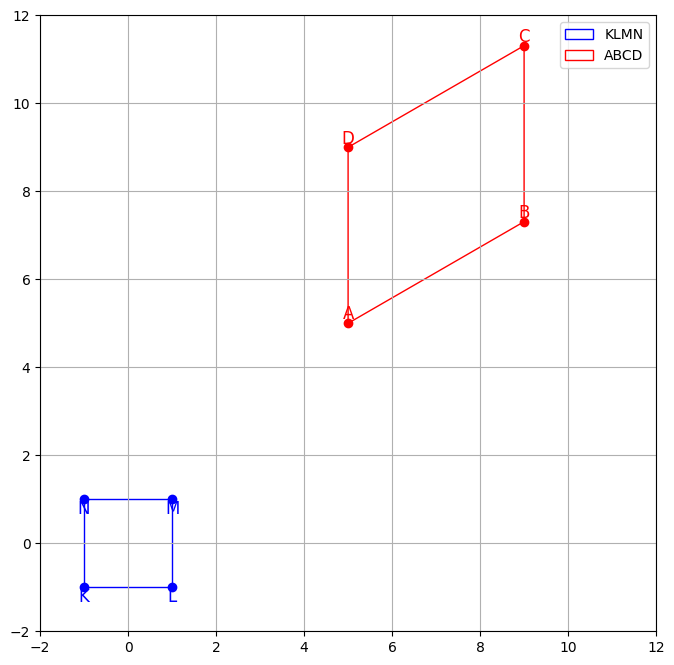


Исходный вектор KN = [0 2] (длина=2)
Полученный вектор AD = [0 4] (длина=?) 4.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D

# ---------- Вспомогательные функции ----------
def apply_transform(points, mat):
    """
    Применяет аффинную матрицу mat (3x3) к набору декартовых точек (N×2).
    Возвращает массив N×2.
    """
    homog = np.hstack([points, np.ones((points.shape[0],1))])  
    transformed = homog @ mat.T
    return transformed[:, :2]

# ----- Исходный квадрат KLMN -----
# Пусть K=(-1,-1), L=(1,-1), M=(1,1), N=(-1,1).
K = np.array([-1, -1])
L = np.array([ 1, -1])
M = np.array([ 1,  1])
N = np.array([-1,  1])
square = np.vstack([K,L,M,N])
square_hom = np.column_stack((square, np.ones(4)))  # Однородные координаты

# ----- 1) Находим A на луче KM в 3 раза дальше от K -----
#    Вектор KM = (2,2). Умножаем на 3 => (6,6).
#    A = K + (6,6) => (5,5).
A = K + 3*(M - K)

# ----- 2) Требуем KN -> AD, удлиняя в 2 раза -----
#    KN = (0,2). В 2 раза больше => (0,4).
#    Следовательно, D = A + (0,4).
D = A + 2*(N - K)  # (N-K)=(0,2), умножаем на 2 => (0,4)

# ----- 3) Угол при A = π/3 -----
#    Теперь вектор AD вертикален (0,4). Чтобы угол между AD и AB был π/3,
#    выберем AB с направлением, отличающимся от вертикали на π/3.
#    Если AD — «строго вверх», то AD ~ угол π/2 от оси x.
#    Значит AB имеет угол = π/2 ± π/3. Допустим, возьмём π/2 - π/3 = π/6 (30°).
angle_AB = np.pi/6
dir_AB = np.array([np.cos(angle_AB), np.sin(angle_AB)])

# ----- 4) Высота BH должна быть = 4 -----
#    Высота = |AB| * sin(угол(AB, AD)) = |AB| * sin(π/3).
#    => |AB| = 4 / sin(π/3) = 8/√3.
length_AB = 4 / np.sin(np.pi/3)
AB_vec = length_AB * dir_AB  # (8/√3)·(cos 30°, sin 30°)

# C = B + (D - A), но сначала найдём B = A + AB_vec.
B = A + AB_vec
C = B + (D - A)  # Параллелограмм (AB||DC).

# Собираем вершины ABCD
ABCD = np.vstack([A,B,C,D])
ABCD_hom = np.column_stack((ABCD, np.ones(4)))

# ----- Строим матрицу F -----
F = ABCD_hom.T @ np.linalg.pinv(square_hom.T)

print("KLMN:\n", square)
print("\nABCD:\n", ABCD)
print("\nМатрица F:\n", F)

# ----- Проверяем, что действительно F(KLMN)=ABCD -----
transformed_sq = (square_hom @ F.T)
transformed_sq = transformed_sq[:, :2] / transformed_sq[:, 2:]
print("\nПроверка F(KLMN):\n", transformed_sq, "\n(должно совпадать с ABCD)")

# ----- Проверяем обратное преобразование F^(-1) -----
F_inv = np.linalg.inv(F)
transformed_abcd = (ABCD_hom @ F_inv.T)
transformed_abcd = transformed_abcd[:, :2] / transformed_abcd[:, 2:]
print("\nПроверка F⁻¹(ABCD):\n", transformed_abcd, "\n(должно совпадать с KLMN)")

# ----- Визуализация -----
fig, ax = plt.subplots(figsize=(8,8))
# Исходный квадрат
poly_sq = Polygon(square, closed=True, fill=False, color='blue', label='KLMN')
ax.add_patch(poly_sq)
ax.plot(square[:,0], square[:,1], 'bo')
for (x,y), name in zip(square, list("KLMN")):
    ax.text(x,y,name,color='blue',fontsize=12,ha='center',va='top')

# Параллелограмм
poly_par = Polygon(ABCD, closed=True, fill=False, color='red', label='ABCD')
ax.add_patch(poly_par)
ax.plot(ABCD[:,0], ABCD[:,1], 'ro')
for (x,y), name in zip(ABCD, list("ABCD")):
    ax.text(x,y,name,color='red',fontsize=12,ha='center',va='bottom')

ax.set_aspect('equal')
ax.grid(True)
ax.set_xlim(-2,12)
ax.set_ylim(-2,12)
ax.legend()
plt.show()

# ----- Доп. проверка: KN → AD -----
print("\nИсходный вектор KN =", N-K, "(длина=2)")
print("Полученный вектор AD =", D-A, "(длина=?)", np.linalg.norm(D-A))
